Import package

In [1]:
import package_.preprocessing as preprocessing
import package_.featureSelection as featureSelection
import package_.classifier as classifier
import package_.ensemble as ensemble
import package_.performanceMetrics as performanceMetrics

Preprocessing

In [2]:
pr = preprocessing.DataPreprocessing()
pr.load_data('test_data/exampleData_TCGA_LUAD_2000.csv')
pr.show_data()

All columns are numeric
   class       SFTPC      SLC6A4      CLDN18        AGER       ITLN2  \
0      0  1956543357  1194806369  1431426819    15756623  9202700052   
1      0  1882400352  1212759862  1410754294  1466652971  7496015673   
2      0   185419824   117178896  1350193883  1493867899  8440654097   
3      0  1883454212  8590519685  1413681776  1401127311  7259752678   
4      0   189885652  1090221599  1382853275  1586313843  9767982962   

         LGI3    C13orf36      FAM83A       FABP4  ...        NEXN  \
0  1104918265   781892276  4642643817  1200926661  ...  9059098627   
1  1095692946   599455936  4397002003  1340728849  ...  8334597771   
2   974068509  7331127442  1885183866  1395746318  ...  9298702299   
3  1083758008  4755827619  3122490507   850509221  ...    72414951   
4  1135184185  9122156047  5235413063  1081828059  ...  9521703289   

       RASSF8        NKD1     PLEKHH2        EDN2       WDR86      CHRNB4  \
0  9661630615  7501576879  9103011571  295309

In [3]:
X, y = pr.set_target('class')

Feature Selection

In [4]:
lasso_features = featureSelection.FeatureSelection(X, y, 'lasso', 100)

In [5]:
lasso_features.show_features()

['SFTPC', 'SLC6A4', 'CLDN18', 'AGER', 'ITLN2', 'LGI3', 'C13orf36', 'FAM83A', 'FABP4', 'HBA1']


In [6]:
lasso_features = lasso_features.get_features()

Classifier

In [7]:
clf1 = classifier.Classifier(X, y, features=lasso_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=3)

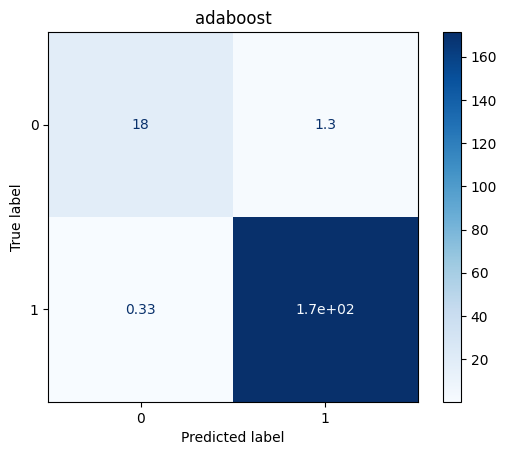

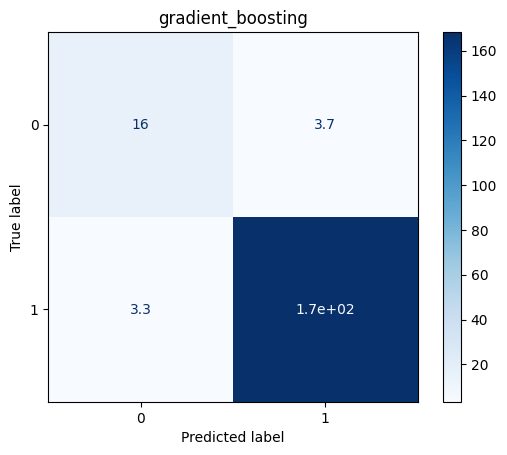

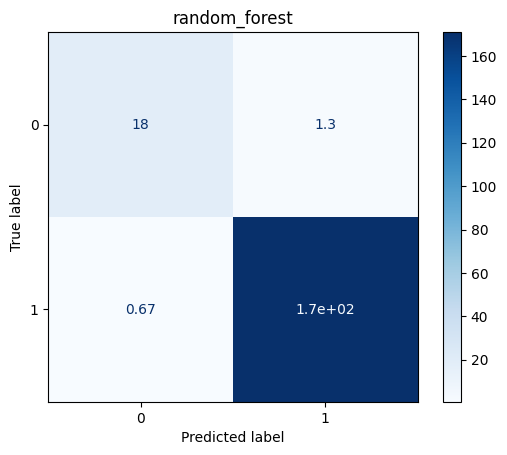

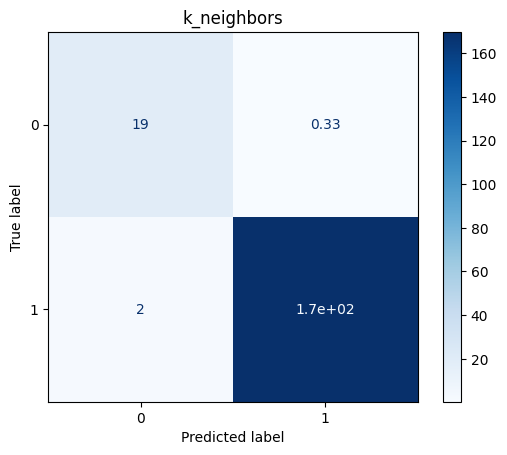

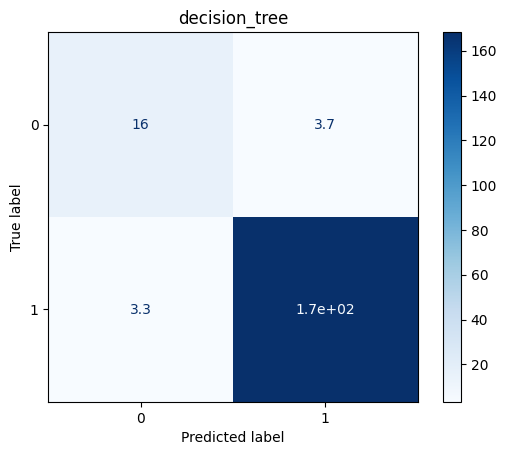

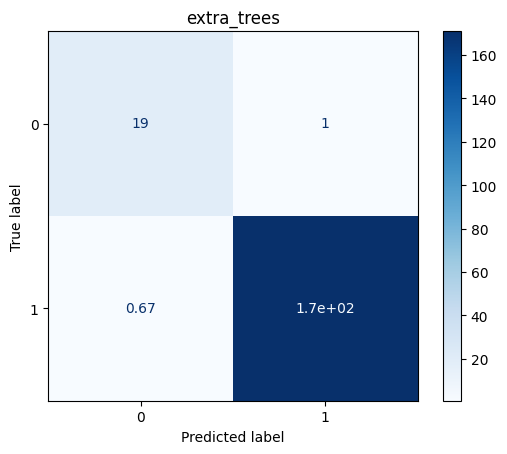

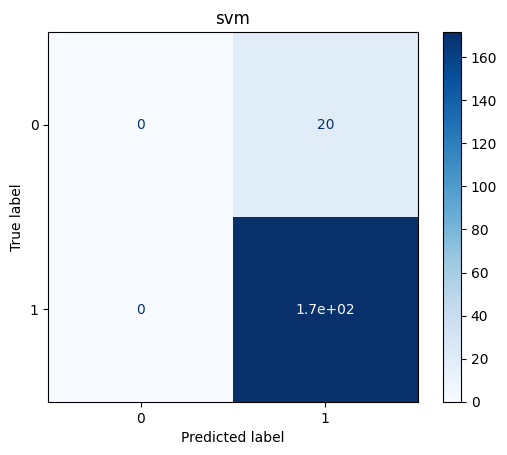

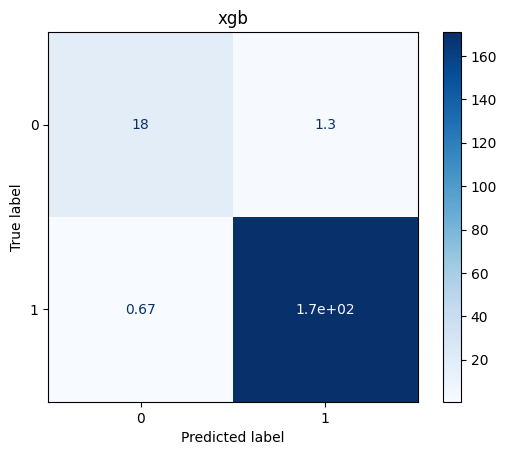

["Confusion matrix:{'adaboost': array([[ 18.33333333,   1.33333333],\n       [  0.33333333, 171.33333333]]), 'gradient_boosting': array([[ 16.        ,   3.66666667],\n       [  3.33333333, 168.33333333]]), 'random_forest': array([[ 18.33333333,   1.33333333],\n       [  0.66666667, 171.        ]]), 'k_neighbors': array([[ 19.33333333,   0.33333333],\n       [  2.        , 169.66666667]]), 'decision_tree': array([[ 16.        ,   3.66666667],\n       [  3.33333333, 168.33333333]]), 'extra_trees': array([[ 18.66666667,   1.        ],\n       [  0.66666667, 171.        ]]), 'svm': array([[  0.        ,  19.66666667],\n       [  0.        , 171.66666667]]), 'xgb': array([[ 18.33333333,   1.33333333],\n       [  0.66666667, 171.        ]])}",
 "ACC: {'adaboost': 0.991292175683537, 'gradient_boosting': 0.9634325916230367, 'random_forest': 0.9895560645724258, 'k_neighbors': 0.9877926847004072, 'decision_tree': 0.9634416812100058, 'extra_trees': 0.991292175683537, 'svm': 0.8972149505526469, '

In [8]:
pm1 = performanceMetrics.PerformanceMetrics(clf1.y_test, clf1.predictions, fold=clf1.fold)
pm1.all_metrics()

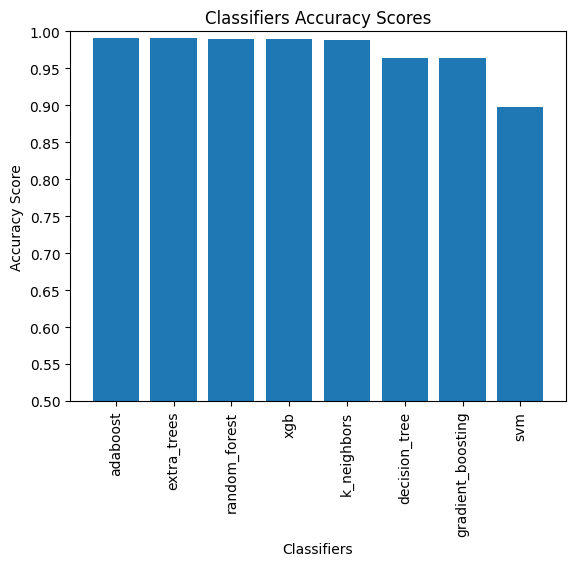

In [9]:
pm1.plot_classifier_acc()

Ensemble

In [10]:
ens1 = ensemble.Ensemble(X, y, features=lasso_features, ensemble='Bagging', classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=3) 

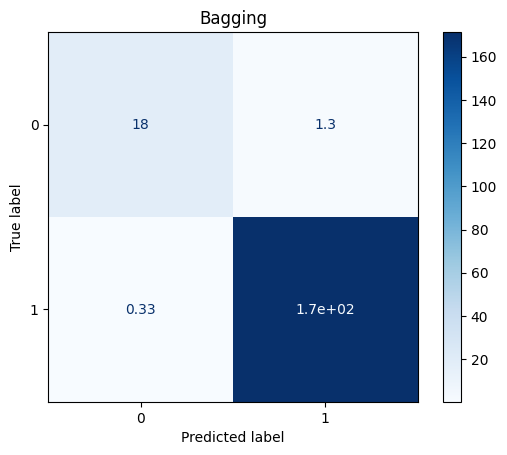

["Confusion matrix:{'Bagging': array([[ 18.33333333,   1.33333333],\n       [  0.33333333, 171.33333333]])}",
 "ACC: {'Bagging': 0.9913012652705061}",
 "Roc Auc: {'Bagging': 0.9652590779273765}",
 "F1 score: {'Bagging': 0.9951801711234726}",
 "MCC: {'Bagging': 0.9518574284862437}",
 "MSE: {'Bagging': 0.008698734729493892}"]

In [11]:
pm2 = performanceMetrics.PerformanceMetrics(ens1.y_test, ens1.predictions, fold=ens1.fold)
pm2.all_metrics()